In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models and tools
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


In [3]:
# Load dataset
data = pd.read_csv('heart_disease_uci(1).csv')  # Adjust path if needed

# Preview first few rows
data.head()


,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [14]:
# Check for missing values
print(data.isnull().sum())


data = data.dropna()

# Drop target columns from features
X = data.drop(columns=['chol', 'num'])  
y = data['chol']  
# Check feature types
X.dtypes


age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


age           int64
sex          object
dataset      object
cp           object
trestbps    float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
dtype: object

In [5]:
X = pd.get_dummies(X, drop_first=True)


In [16]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create range of alpha and l1_ratio values
alphas = np.logspace(-4, 1, 10)      
l1_ratios = np.linspace(0, 1, 10)    





In [8]:
# Initialize result storage
r2_scores = np.zeros((len(alphas), len(l1_ratios)))
rmse_scores = np.zeros((len(alphas), len(l1_ratios)))

# Grid search over all combinations of alpha and l1_ratio
for i, alpha in enumerate(alphas):
    for j, l1_ratio in enumerate(l1_ratios):
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        r2_scores[i, j] = r2
        rmse_scores[i, j] = rmse


c:\Users\s22su\Documents\BINF Data Mining\BINF 5507\BINF-5507\.pixi\envs\default\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.764e+05, tolerance: 6.764e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\s22su\Documents\BINF Data Mining\BINF 5507\BINF-5507\.pixi\envs\default\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.770e+05, tolerance: 6.764e+01 Linear regression models with null weight 

In [17]:
# Get best R² score
best_idx = np.unravel_index(np.argmax(r2_scores), r2_scores.shape)
best_alpha = alphas[best_idx[0]]
best_l1 = l1_ratios[best_idx[1]]
best_r2 = r2_scores[best_idx]
best_rmse = rmse_scores[best_idx]

print(f"✅ Best ElasticNet model:")
print(f"Alpha: {best_alpha:.5f}")
print(f"L1 Ratio: {best_l1:.2f}")
print(f"R² Score: {best_r2:.4f}")
print(f"RMSE: {best_rmse:.4f}")


✅ Best ElasticNet model:
Alpha: 2.78256
L1 Ratio: 1.00
R² Score: 0.0900
RMSE: 47.0287


c:\Users\s22su\Documents\BINF Data Mining\BINF 5507\BINF-5507\.pixi\envs\default\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


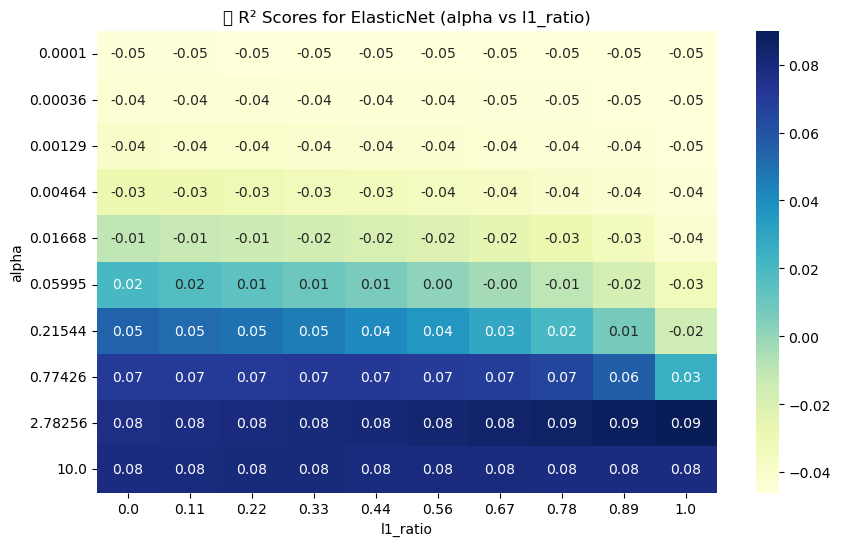

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(r2_scores, 
            xticklabels=np.round(l1_ratios, 2),
            yticklabels=np.round(alphas, 5),
            cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("🔵 R² Scores for ElasticNet (alpha vs l1_ratio)")
plt.xlabel("l1_ratio")
plt.ylabel("alpha")
plt.show()


c:\Users\s22su\Documents\BINF Data Mining\BINF 5507\BINF-5507\.pixi\envs\default\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


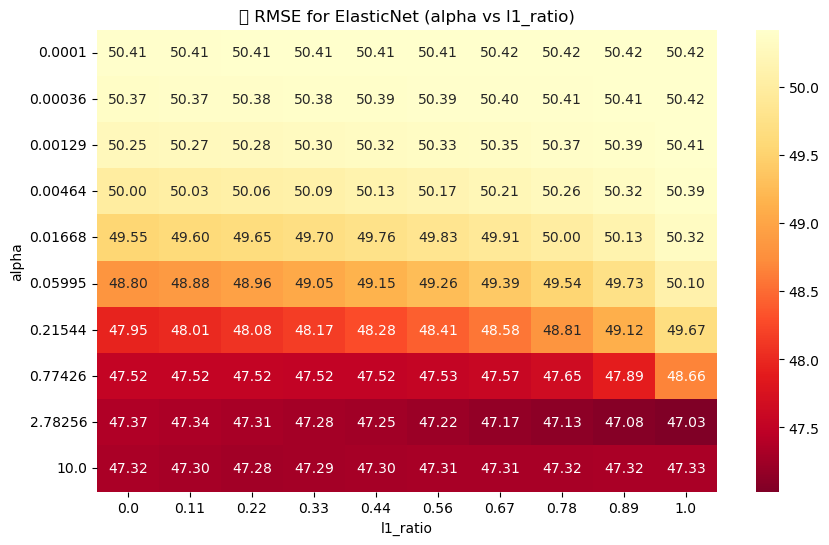

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(rmse_scores, 
            xticklabels=np.round(l1_ratios, 2),
            yticklabels=np.round(alphas, 5),
            cmap="YlOrRd_r", annot=True, fmt=".2f")
plt.title("🔴 RMSE for ElasticNet (alpha vs l1_ratio)")
plt.xlabel("l1_ratio")
plt.ylabel("alpha")
plt.show()
